## Observations and Insights 

- Observation 1: There is a strong positive correlation for mice taking Capomulin between Tumor Volume and Weight - would be interesting to see if the same holds true for the other drug regimens. 

- Observation 2: Mice taking Capomulin or Ramicane had more readings than mice taking other drugs - despite all drugs having 24-25 unique mice. I would want to understand the reasons why other mice stopped having measurements and compare the results more closely. My hypothesis would be that Capomulin and Ramicane are allowing the mice to live longer.

- Observation 3: For mouse s185 - the drug Capomulin seemed to be working as his tumor size decreased over time. I would want to run the same analysis on all Capomulin mice to see if this was a similar result. Additionally, would want to look at the other drug mice and compare how many and to what degree saw tumor volume reduction.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
full_set_df = pd.merge(mouse_metadata, study_results, how='outer', on = "Mouse ID")

# Display the data table for preview
full_set_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
full_set_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Had to get help from Stackoverflow for this one https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas
duplicates_df = full_set_df[full_set_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep =False)]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

#See above - duplicate Mouse ID = g989

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
full_set_df.drop(full_set_df.loc[full_set_df['Mouse ID']=="g989"].index, inplace=True)

In [6]:
# Checking the number of mice in the clean DataFrame.
full_set_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_df = full_set_df.groupby(["Drug Regimen"])
mean = grouped_df[["Tumor Volume (mm3)"]].mean()
median = grouped_df[["Tumor Volume (mm3)"]].median()
var = grouped_df[["Tumor Volume (mm3)"]].var()
std = grouped_df[["Tumor Volume (mm3)"]].std()
sem = grouped_df[["Tumor Volume (mm3)"]].sem()

# Assemble the resulting series into a single summary dataframe.

stat_summary_df = pd.concat([mean, median, var, std, sem], axis=1)
stat_summary_df.columns = ['mean', 'median', 'var', 'std', 'sem']
stat_summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = grouped_df.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})

agg_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

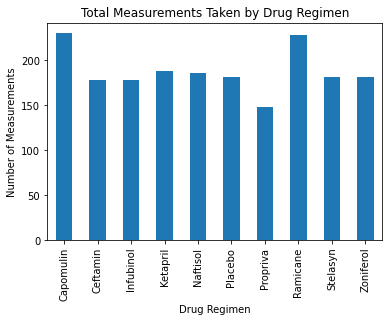

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
total_measurements=grouped_df['Mouse ID'].count()

total_bar_chart = total_measurements.plot(kind ="bar", title="Total Measurements Taken by Drug Regimen")
total_bar_chart.set_xlabel("Drug Regimen")
total_bar_chart.set_ylabel("Number of Measurements")

plt.show()

Text(0, 0.5, 'Number of Measurements')

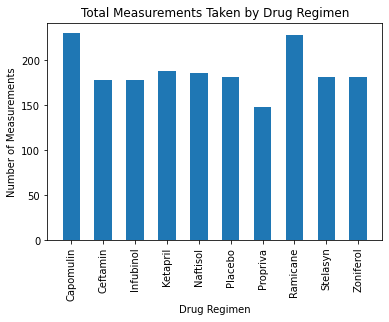

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# use Matplotlib
drugs = full_set_df['Drug Regimen'].unique()
drugs = sorted(drugs)


plt.bar(drugs, total_measurements, width=0.55)
plt.title("Total Measurements Taken by Drug Regimen")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")

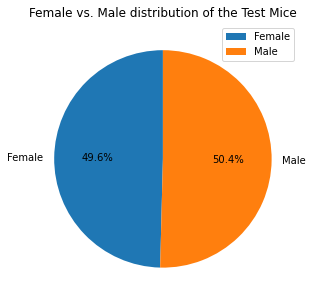

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# needs to be based on unique ID - not total recordings - total mice should equal 248
# first need to get a count of unique mice by sex 
mice_sex = full_set_df.drop(columns=['Drug Regimen', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'] )
mice_sex.drop_duplicates(subset = ['Mouse ID'], inplace = True)

sex_count = mice_sex.groupby(['Sex']).count()

# then need to build out the pie chart using pandas
panda_pie =sex_count.plot.pie(y='Mouse ID', ylabel = '',startangle= 90, figsize = (5,5),title = "Female vs. Male distribution of the Test Mice", autopct="%1.1f%%")


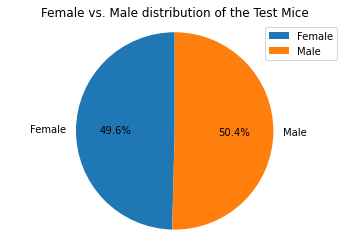

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count.reset_index(inplace = True)
mpie_labels = sex_count.Sex
mpie_x = sex_count['Mouse ID']

plt.title("Female vs. Male distribution of the Test Mice")
plt.pie(mpie_x, labels = mpie_labels, autopct="%1.1f%%", startangle=90)
plt.legend()
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
full_set_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_grouped_df = full_set_df.groupby(["Mouse ID"])["Timepoint"].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_merge_df = pd.merge(mouse_grouped_df, full_set_df, how='left', on = ["Mouse ID", "Timepoint"])
mouse_merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
    filtered_data = mouse_merge_df[mouse_merge_df['Drug Regimen']== drug]
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_tumor_sizes = filtered_data['Tumor Volume (mm3)']
    
    # add subset 
    final_tumor_volume_data.append(filtered_tumor_sizes)
    
    # Determine outliers using upper and lower bounds
    quartiles = filtered_tumor_sizes.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    

    outlier_df = filtered_data.loc[(filtered_data['Tumor Volume (mm3)'] < lower_bound) | (filtered_data['Tumor Volume (mm3)'] > upper_bound)]
    if len(outlier_df)>0: print(drug)

Infubinol


<ipython-input-16-03e5dcc4f903>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(drug_list)


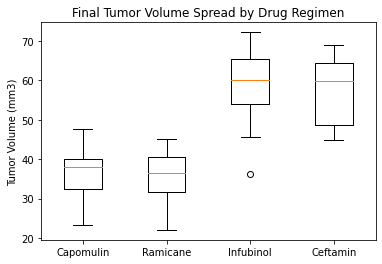

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 =plt.subplots()
ax1.set_title('Final Tumor Volume Spread by Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xticklabels(drug_list)
ax1.boxplot(final_tumor_volume_data, manage_ticks=True)
plt.show()


## Line and Scatter Plots

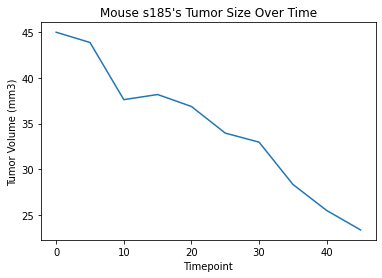

In [17]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# first find mouse ID for a mouse treated with Capomulin
capomulin_mice = full_set_df[full_set_df['Drug Regimen'] == 'Capomulin']


s185_mouse = capomulin_mice[capomulin_mice['Mouse ID']=='s185']


# then use that mouse to create X (time points) and y (tumor size) axis
s185_timepoint = s185_mouse.Timepoint
s185_tumor_size = s185_mouse['Tumor Volume (mm3)']

#then plot on line graph
plt.plot(s185_timepoint, s185_tumor_size)

plt.title("Mouse s185's Tumor Size Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

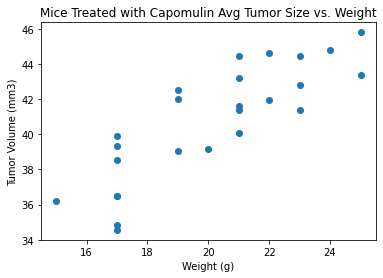

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# I assumed this meant for all mice that took Capomulin
capomulin_grouped = capomulin_mice.groupby(["Mouse ID"]).mean()

#create lists for x and y 
capomulin_tumor_size = capomulin_grouped['Tumor Volume (mm3)']
capomulin_weight = capomulin_grouped['Weight (g)']

#create scatter plot
plt.scatter(capomulin_weight,capomulin_tumor_size)
plt.title("Mice Treated with Capomulin Avg Tumor Size vs. Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficicent between mouse weight and average tumor volume is {round(st.pearsonr(capomulin_weight, capomulin_tumor_size)[0],2)}")

The correlation coefficicent between mouse weight and average tumor volume is 0.84


The r-squared is: 0.7088568047708717


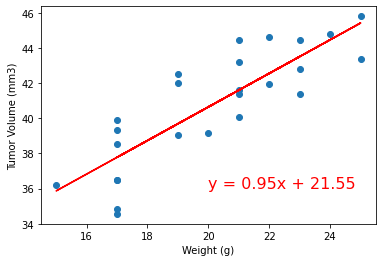

In [20]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight, capomulin_tumor_size)
regress_values = capomulin_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capomulin_weight,capomulin_tumor_size)
plt.plot(capomulin_weight,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()